# MultiDimensional Scaling (MDS)  And Principle Coordinate Analysis (PCoA)

#### MDS -> 1. classical or metric (PCoA)
####       2. Non Metric 

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
rng=np.random.default_rng(seed=42)

In [3]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8]
])
# an array of to coordinate

In [6]:
distance_matrix=pairwise_distances(X,metric='euclidean')
print(distance_matrix)

[[0.         2.82842712 5.65685425 8.48528137]
 [2.82842712 0.         2.82842712 5.65685425]
 [5.65685425 2.82842712 0.         2.82842712]
 [8.48528137 5.65685425 2.82842712 0.        ]]


In [7]:
mds=MDS(n_components=2,dissimilarity='precomputed',random_state=42)
PCoA=mds.fit_transform(distance_matrix)

In [8]:
df_PCoA=pd.DataFrame(PCoA,columns=[['cord1','cord2']])

In [9]:
df_PCoA

,cord1,cord2
0,1.464482,3.955658
1,-0.076821,1.476923
2,0.105830,-1.489464
3,-1.493491,-3.943117


In [12]:
df_array=df_PCoA.to_numpy()
print(df_array)

[[ 1.4644821   3.95565796]
 [-0.07682106  1.47692287]
 [ 0.10583041 -1.48946419]
 [-1.49349144 -3.94311664]]


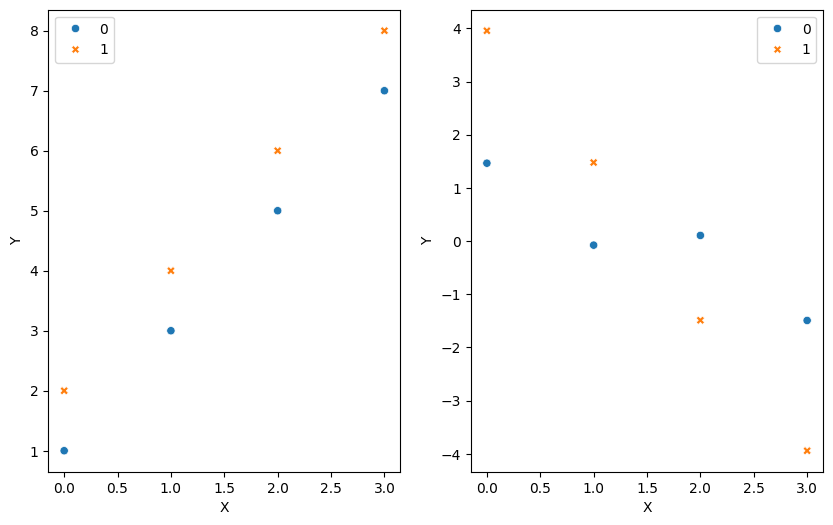

In [13]:
fig,ax=plt.subplots(ncols=2,figsize=(10,6))
sns.scatterplot(X,ax=ax[0])
ax[0].set(xlabel='X',ylabel='Y')
ax[0].legend()
sns.scatterplot(df_array,ax=ax[1])
ax[1].set(xlabel='X',ylabel='Y')
ax[1].legend()
plt.show()

In [14]:
# creating data 
data=np.array(rng.normal(size=[100,10]))

In [17]:
data.shape

(100, 10)

In [24]:
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range(6,11)]
df=pd.DataFrame(columns=[*wt,*ko],index=np.arange(1,data.shape[0]+1))

In [25]:
df.head()

,wt1,wt2,wt3,wt4,wt5,ko6,ko7,ko8,ko9,ko10
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
for i in range(1,100):
    df.loc[i,'wt1':'wt5']=np.round(np.abs(data[i,1:6])*1000)
    df.loc[i,'ko6':'ko10']=np.round(np.abs(data[i,5:10])*1000)

In [67]:
print(df.head())
print(df.isna().sum())
df.fillna(value=855.0,inplace=True)

     wt1     wt2     wt3    wt4     wt5     ko6    ko7     ko8    ko9   ko10
1  778.0    66.0  1127.0  468.0   859.0   859.0  369.0   959.0  878.0   50.0
2  681.0  1223.0   155.0  428.0   352.0   352.0  532.0   365.0  413.0  431.0
3  406.0   512.0   814.0  616.0  1129.0  1129.0  114.0   840.0  824.0  651.0
4  543.0   666.0   232.0  117.0   219.0   219.0  871.0   224.0  679.0   68.0
5  631.0  1457.0   320.0  470.0   639.0   639.0  275.0  1495.0  866.0  968.0
wt1     0
wt2     0
wt3     0
wt4     0
wt5     0
ko6     0
ko7     0
ko8     0
ko9     0
ko10    0
dtype: int64


In [59]:
df_scaled=scale(df)
pca=PCA()
pca.fit(df)
pca_fit=pca.fit_transform(df)

In [60]:
print(pca_fit)

[[-2.43526412e+00 -7.12656373e+02 -4.19624332e+01 -3.81444074e+02
   2.67104343e+02 -6.39958047e+02 -6.42425235e+02 -1.15818443e+02
   6.35939053e+01 -1.29726827e-13]
 [-5.47248984e+02 -3.18892343e+02 -8.99901989e+02 -1.78239023e+02
  -4.28352571e+02  3.72543128e+02  1.70920469e+02  1.56416625e+02
  -2.11441019e+02 -8.47176031e-14]
 [ 5.98310639e+02 -3.98533829e+02 -5.82994177e+01 -4.17544366e+02
  -3.57012582e+01 -1.43968543e+02 -3.19573503e+02 -1.91393732e+02
  -3.07210052e+02 -1.11891774e-13]
 [-8.78735153e+02 -5.56972390e+02 -8.30122357e+02  1.39191394e+02
  -5.28860596e+02  1.49027928e+02 -4.63721674e+02  7.10151796e+00
   6.10204626e+00 -1.44174342e-13]
 [ 2.29700185e+02  3.60806850e+02 -4.87506692e+02 -5.78590439e+02
  -3.26611329e+00  3.55077389e+02 -7.88447154e+01  8.16296783e+02
  -3.24090202e+02  4.57613229e-14]
 [-1.32609255e+01 -6.86166967e+02 -1.82642401e+02 -1.55155104e+02
  -4.47595915e+02 -4.32497692e+02 -4.64247729e+02 -2.88688198e+02
  -3.19167289e+02 -1.89400773e-13

In [61]:
pca_var=np.round(pca.explained_variance_ratio_*100,decimals=1)

In [62]:
print(pca_var)

[18.8 16.  12.4 11.5 10.4 10.   8.7  6.6  5.6  0. ]


In [64]:
labels=[f'pca{str(i)}' for i in range(1,len(pca_var)+1)]
print(labels)

['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10']


<BarContainer object of 10 artists>

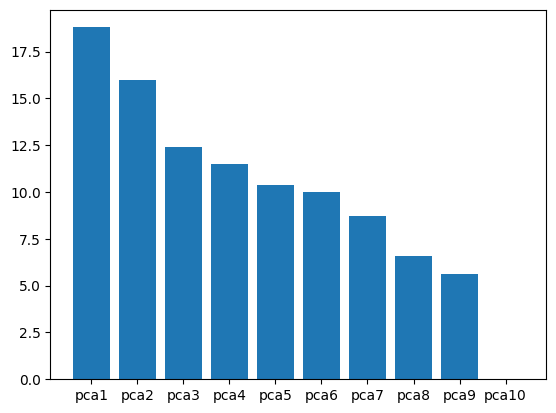

In [66]:
plt.bar(x=range(1,len(labels)+1),height=pca_var,tick_label=labels)

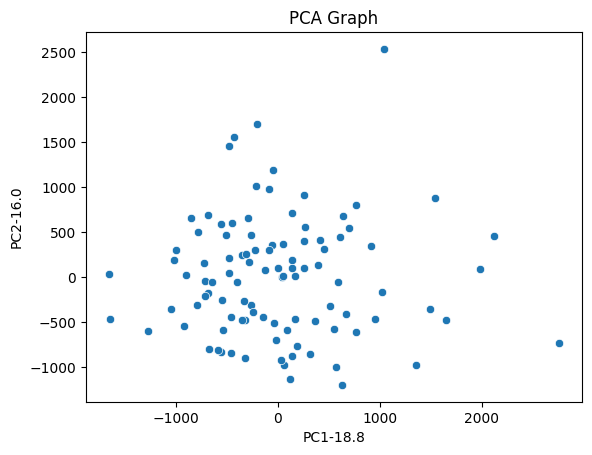

In [76]:
sns.scatterplot(x=pca_fit[:,1],y=pca_fit[:,2])
plt.title('PCA Graph')
plt.xlabel(f'PC1-{pca_var[0]}')
plt.ylabel(f'PC2-{pca_var[1]}')
plt.show()

In [71]:
dist_matrix=pairwise_distances(df.to_numpy(),metric='euclidean')

In [72]:
mds=MDS(n_components=2,dissimilarity='precomputed',random_state=42)
cord=mds.fit_transform(dist_matrix)

In [82]:
print(cord.shape)
print(cord[:,1].shape)
print(cord[:,0].shape)

(100, 2)
(100,)
(100,)


<Axes: >

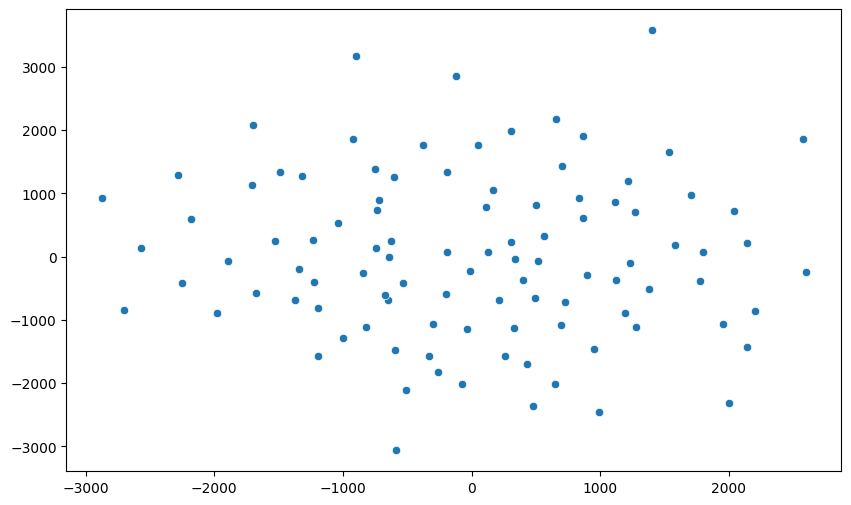

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=cord[:,0],y=cord[:,1])